# **Time Series Prediction Notes-Vedant Naik**

# Long Short-Term Memory (LSTM)
This type of networks are a type of recurrent neural network (RNN) designed to address the challenges of learning long-term dependencies in sequences of data. Unlike traditional RNNs, which struggle with vanishing and exploding gradients, LSTMs can retain information over long periods, making them suitable for tasks involving sequential data such as time series analysis, natural language processing, and speech recognition.

>Imagine you're reading a book, and you come across a character named "Sam" in chapter 15, whom you last saw in chapter 1. To understand the plot, your brain naturally connects the information about Sam from chapter 1 to her actions in chapter 15. This ability to remember and utilize past information over long intervals is precisely what LSTMs are designed to mimic in neural networks.

>LSTMs achieve this through a special architecture that includes memory cells and three types of gates:

>>Forget Gate: Determines which information to discard from the cell state.

>>Input Gate: Updates the cell state with new information.

>>Output Gate: Decides what the next hidden state should be, based on the current input and the memory of the cell.

Each of these gates can learn which data in a sequence is important to keep or throw away, making it possible for LSTMs to learn and remember over long sequences of inputs.

Let's now create reusable tools/functions for the usage of LSTM networks.
> # **Single Feature input and Output - forecasting LSTM**

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                16896     
                                                                 
 dense_2 (Dense)             (None, 8)                 520       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 20s 8ms/step - loss: 95.4997 - root_mean_squared_error: 9.7724 - val_loss: 1.8395 - val_root_mean_squared_error: 1.3563
Epoch 2/10
1875/1875 [==============================] - 16s 9ms/step - loss: 5.3043 - root_mean_squared_er

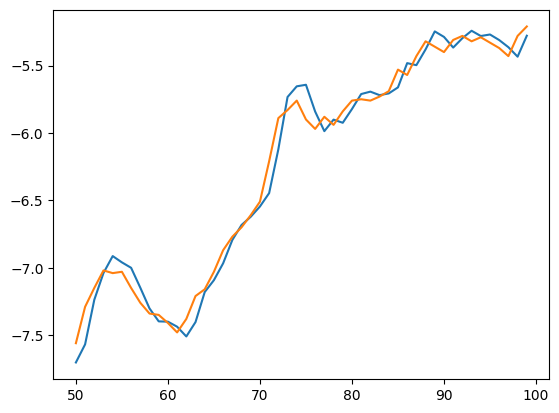

In [4]:
#This section includes basic/required imports
import tensorflow as tf
import os # optional if not reading a zip file..etc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
# lets assume we are reading a free online data set
# Replace the Data set according to requirements
# Begin Data
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)
df = pd.read_csv(csv_path)
df.head(3)
#End Data

#Convert the date time stamp of data to Pandas date time form  ## Not used rn, would be useful in future
df.index = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')

# Selecting the only feature to forecast
temp = df['T (degC)']

# Defining window for predictions, optional but generally helpful... this means taking values x and forecasting x+1
def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)
# This function would essentially do something like this:
#         INPUT                                       | OUTPUT
# [[[temp 1], [temp 2], [temp 3], [temp 4], [temp 5]]] [temp 6]
# [[[temp 2], [temp 3], [temp 4], [temp 5], [temp 6]]] [temp 7]
# [[[temp 3], [temp 4], [temp 5], [temp 6], [temp 7]]] [temp 8]

WINDOW_SIZE = 5
X1, y1 = df_to_X_y(temp, WINDOW_SIZE)
X1.shape, y1.shape

X_train1, y_train1 = X1[:60000], y1[:60000]
X_val1, y_val1 = X1[60000:65000], y1[60000:65000]
X_test1, y_test1 = X1[65000:], y1[65000:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

# Defining Model Architecture
model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()
# Defining callbacks to save most apt model
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

#Train the model
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp1])

#Load best trained model saved by call back
model1 = load_model('model1/')

# Test model on training data set
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100])

# Test Model on Validation data set
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actuals'][:100])

# Test Model on test data set
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1})
plt.plot(test_results['Test Predictions'][:100])
plt.plot(test_results['Actuals'][:100])

> # **Multiple Input and Single Output Forecasting LSTM**








Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 64)                17920     
                                                                 
 dense_6 (Dense)             (None, 8)                 520       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 18449 (72.07 KB)
Trainable params: 18449 (72.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 21s 10ms/step - loss: 26.7714 - root_mean_squared_error: 5.1741 - val_loss: 1.6666 - val_root_mean_squared_error: 1.2910
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 1.6887 - root_mean_squared_e

(        Predictions  Actuals
 0          9.199200     9.11
 1          9.151531     8.88
 2          9.011153     8.76
 3          8.815615     8.92
 4          8.782050     9.48
 ...             ...      ...
 355540    -4.043574    -4.05
 355541    -3.946816    -3.35
 355542    -3.704766    -3.16
 355543    -3.492456    -4.23
 355544    -3.666331    -4.82
 
 [355545 rows x 2 columns],
 0.11407808448889221)

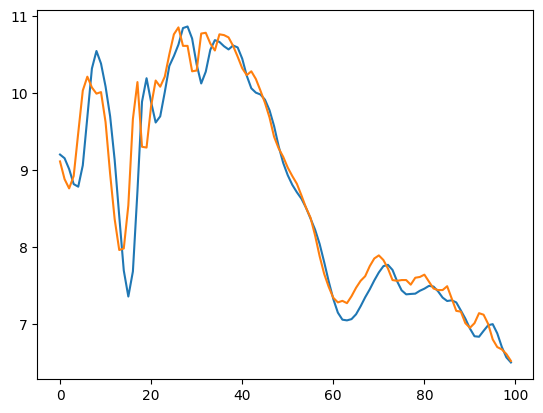

In [6]:
#This section includes basic/required imports
import tensorflow as tf
import os # optional if not reading a zip file..etc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error as mse
from tensorflow.keras.models import load_model
# lets assume we are reading a free online data set
# Replace the Data set according to requirements
# Begin Data
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)
df = pd.read_csv(csv_path)
df.head(3)
#End Data

#Convert the date time stamp of data to Pandas date time form
df.index = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')

# Selecting Data
temp_df = pd.DataFrame({'Temperature':temp})
temp_df['Seconds'] = temp_df.index.map(pd.Timestamp.timestamp)

#Lets create a function to plot pred vs truth
def plot_predictions1(model, X, y, start=0, end=100):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  return df, mse(y, predictions)

# Definign the cyclical nature of time with Day/Year sin and cos.
day = 60*60*24
year = 365.2425*day

temp_df['Day sin'] = np.sin(temp_df['Seconds'] * (2* np.pi / day))
temp_df['Day cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / day))
temp_df['Year sin'] = np.sin(temp_df['Seconds'] * (2 * np.pi / year))
temp_df['Year cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / year))
temp_df.head()

# Get rid of seconds... monotonous increasing
temp_df = temp_df.drop('Seconds', axis=1)
temp_df.head()

# Processing the data for network
def df_to_X_y2(df, window_size=6):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][0]
    y.append(label)
  return np.array(X), np.array(y)

X2, y2 = df_to_X_y2(temp_df)

X2_train, y2_train = X2[:60000], y2[:60000]
X2_val, y2_val = X2[60000:65000], y2[60000:65000]
X2_test, y2_test = X2[65000:], y2[65000:]
X2_train.shape, y2_train.shape, X2_val.shape, y2_val.shape, X2_test.shape, y2_test.shape

# Standardize the data, as the span of all inputs vary signinficatly, thus it may mess with the cost function
temp_training_mean = np.mean(X2_train[:, :, 0])
temp_training_std = np.std(X2_train[:, :, 0])

def preprocess(X):
  X[:, :, 0] = (X[:, :, 0] - temp_training_mean) / temp_training_std
  return X
preprocess(X2_train)
preprocess(X2_val)
preprocess(X2_test)

#Defining Model Architecture
model4 = Sequential()
model4.add(InputLayer((6, 5)))
model4.add(LSTM(64))
model4.add(Dense(8, 'relu'))
model4.add(Dense(1, 'linear'))

model4.summary()

#Call backs
cp4 = ModelCheckpoint('model4/', save_best_only=True)
model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

#Train the model
model4.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs=10, callbacks=[cp4])
plot_predictions1(model4, X2_test, y2_test)

> # **Multiple input and Multiple output network -LSTM**
Multiple input -multi related features
Multiple output -multiple time step forecast or multifeature output

In [ ]:
#This section includes basic/required imports
import tensorflow as tf
import os # optional if not reading a zip file..etc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error as mse
# lets assume we are reading a free online data set
# Replace the Data set according to requirements
# Begin Data
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)
df = pd.read_csv(csv_path)
df.head(3)
#End Data

#Convert the date time stamp of data to Pandas date time form
df.index = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')

# Selecting Data
temp_df = pd.DataFrame({'Temperature':temp})
temp_df['Seconds'] = temp_df.index.map(pd.Timestamp.timestamp)

#Lets create a function to plot pred vs truth
def plot_predictions1(model, X, y, start=0, end=100):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  return df, mse(y, predictions)

# Definign the cyclical nature of time with Day/Year sin and cos.
day = 60*60*24
year = 365.2425*day

temp_df['Day sin'] = np.sin(temp_df['Seconds'] * (2* np.pi / day))
temp_df['Day cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / day))
temp_df['Year sin'] = np.sin(temp_df['Seconds'] * (2 * np.pi / year))
temp_df['Year cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / year))
temp_df.head()

# Get rid of seconds... monotonous increasing
temp_df = temp_df.drop('Seconds', axis=1)
temp_df.head()

# Adding additional pressure feature
p_temp_df = pd.concat([df['p (mbar)'], temp_df], axis=1)
p_temp_df.head()

# Processing the data for network
def df_to_X_y3(df, window_size=7):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = [df_as_np[i+window_size][0], df_as_np[i+window_size][1]]
    y.append(label)
  return np.array(X), np.array(y)

X3, y3 = df_to_X_y3(p_temp_df)
X3.shape, y3.shape

X3_train, y3_train = X3[:60000], y3[:60000]
X3_val, y3_val = X3[60000:65000], y3[60000:65000]
X3_test, y3_test = X3[65000:], y3[65000:]
X3_train.shape, y3_train.shape, X3_val.shape, y3_val.shape, X3_test.shape, y3_test.shape

# Standardize the data, as the span of all inputs vary signinficatly, thus it may mess with the cost function
temp_training_mean3 = np.mean(X3_train[:, :, 1])
temp_training_std3 = np.std(X3_train[:, :, 1])

p_training_mean3 = np.mean(X3_train[:, :, 0])
p_training_std3 = np.std(X3_train[:, :, 0])

def preprocess3(X):
  X[:, :, 0] = (X[:, :, 0] - p_training_mean3) / p_training_std3
  X[:, :, 1] = (X[:, :, 1] - temp_training_mean3) / temp_training_std3

def preprocess_output3(y):
  y[:, 0] = (y[:, 0] - p_training_mean3) / p_training_std3
  y[:, 1] = (y[:, 1] - temp_training_mean3) / temp_training_std3
  return y

preprocess3(X3_train)
preprocess3(X3_val)
preprocess3(X3_test)

#Defining Model Architecture
model5 = Sequential()
model5.add(InputLayer((7, 6)))
model5.add(LSTM(64))
model5.add(Dense(8, 'relu'))
model5.add(Dense(2, 'linear'))

model5.summary()

def plot_predictions2(model, X, y, start=0, end=100):
  predictions = model.predict(X)
  p_preds, temp_preds = predictions[:, 0], predictions[:, 1]
  p_actuals, temp_actuals = y[:, 0], y[:, 1]
  df = pd.DataFrame(data={'Temperature Predictions': temp_preds,
                          'Temperature Actuals':temp_actuals,
                          'Pressure Predictions': p_preds,
                          'Pressure Actuals': p_actuals
                          })
  plt.plot(df['Temperature Predictions'][start:end])
  plt.plot(df['Temperature Actuals'][start:end])
  plt.plot(df['Pressure Predictions'][start:end])
  plt.plot(df['Pressure Actuals'][start:end])
  return df[start:end]

# Train Model
model5.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp5])
plot_predictions2(model5, X3_test, y3_test)
#Call backs
cp4 = ModelCheckpoint('model4/', save_best_only=True)
model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

def postprocess_temp(arr):
  arr = (arr*temp_training_std3) + temp_training_mean3
  return arr

def postprocess_p(arr):
  arr = (arr*p_training_std3) + p_training_mean3
  return arr

def plot_predictions2(model, X, y, start=0, end=100):
  predictions = model.predict(X)
  p_preds, temp_preds = postprocess_p(predictions[:, 0]), postprocess_temp(predictions[:, 1])
  p_actuals, temp_actuals = postprocess_p(y[:, 0]), postprocess_temp(y[:, 1])
  df = pd.DataFrame(data={'Temperature Predictions': temp_preds,
                          'Temperature Actuals':temp_actuals,
                          'Pressure Predictions': p_preds,
                          'Pressure Actuals': p_actuals
                          })
  plt.plot(df['Temperature Predictions'][start:end])
  plt.plot(df['Temperature Actuals'][start:end])
  plt.plot(df['Pressure Predictions'][start:end])
  plt.plot(df['Pressure Actuals'][start:end])
  return df[start:end]
post_processed_df = plot_predictions2(model5, X3_test, y3_test)
post_processed_df


># **Largely the work flow would be:**

>Store the data from CSV/or whatever to a Pandas data frame
>> `df = pd.read_csv(csv_path)`

> Splice the data in training , validation and testing data sets.

> Reshape the data according to required window size and dim.
>> Example: here df's all collums are treated as input features.
```
def df_to_X_y3(df, window_size=7):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = [df_as_np[i+window_size][0], df_as_np[i+window_size][1]] # Features
    y.append(label)
  return np.array(X), np.array(y)
```

> Standardize the data (preprocess the data )
>> Data_standardized = (Data-mean(data))/standard devation of data
```
def preprocess(X):
  X[:, :, 0] = (X[:, :, 0] - p_training_mean3) / p_training_std3
  X[:, :, 1] = (X[:, :, 1] - temp_training_mean3) / temp_training_std3
def preprocess_output(y):
  y[:, 0] = (y[:, 0] - p_training_mean3) / p_training_std3
  y[:, 1] = (y[:, 1] - temp_training_mean3) / temp_training_std3
  return y
```

> Define the Network Architecture, example:
```
model5 = Sequential()
model5.add(InputLayer((7, 6))) # R = 7 window width, C = 6 no. of features
model5.add(LSTM(64))
model5.add(Dense(8, 'relu'))
model5.add(Dense(2, 'linear'))
model5.summary()
```
> Train the model with apt callbacks

>Post process the output:
>> Scale the predicted output back to physical quantities


